<a href="https://colab.research.google.com/github/kafu77/Support_Vector_Machine/blob/main/Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data reading and visaulizing tools
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline

#preprocessing tools
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.tree import export_text, plot_tree,export_graphviz

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#additional tools
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

from sklearn import set_config
set_config(display='diagram')

In [2]:
heart_attack=pd.read_csv('/content/drive/MyDrive/SVM/Heart_Disease_Prediction.csv')

In [3]:
heart_attack.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
heart_attack.shape

(270, 14)

In [5]:
#heart disease classes
heart_attack['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [ ]:
sum(heart_attack['Heart Disease']=='Presence'),sum(heart_attack['Heart Disease']=='Absence')

(120, 150)

The heart disease classes are imbalanced

### EDA

In [ ]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
heart_attack.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


The Age is extented from 29 to 77 years old, mininim BP is 94 and maximum is 200 and minnimum and maximum cholesterol is 126, 564 respectively. As the cholesterol level increase the potentail of the blood stearms getting narrow is high, then the risk of heart attack is high.The high pressure makes the streams narrow and blocking the flow and cuase the heart attack. Naturally, as we getting old our cholesterol increase. The minimum and maximum heart rate is 71and 202. The heart rate when you have a heart attack may alter and can be either slower or faster than normal heart rate or maybe with skipped beats or extra abnormal beats.

In [ ]:
#checking missing values 
heart_attack.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

No missing values

### Data Visualization

(array([0.00345912, 0.01422082, 0.01844864, 0.02536688, 0.02113906,
        0.00960867, 0.00691824, 0.00115304, 0.00269043, 0.        ,
        0.00076869]),
 array([ 94.        , 103.63636364, 113.27272727, 122.90909091,
        132.54545455, 142.18181818, 151.81818182, 161.45454545,
        171.09090909, 180.72727273, 190.36363636, 200.        ]),
 <a list of 11 Patch objects>)

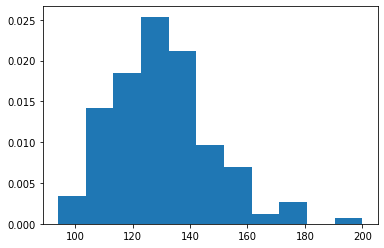

In [ ]:
# visualizing using a distribution plot
plt.hist(heart_attack['BP'], bins=11,density=True)

(array([7.61035008e-04, 5.07356672e-03, 7.86402841e-03, 5.66548283e-03,
        2.79046169e-03, 2.53678336e-04, 3.38237781e-04, 0.00000000e+00,
        0.00000000e+00, 8.45594453e-05]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <a list of 10 Patch objects>)

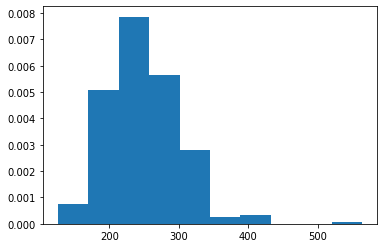

In [ ]:
plt.hist(heart_attack['Cholesterol'], bins=10,density=True)

The data for the blood pressure and cholesterol is uniformly distributed

(array([0.0007716 , 0.00617284, 0.02314815, 0.02700617, 0.02700617,
        0.03858025, 0.04398148, 0.02932099, 0.01003086, 0.00231481]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

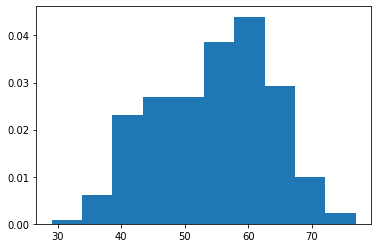

In [ ]:
plt.hist(heart_attack['Age'], bins=10,density=True)

(array([0.00028273, 0.00141363, 0.00310998, 0.00650269, 0.00876449,
        0.01272265, 0.02007351, 0.01526718, 0.00678541, 0.00141363]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 10 Patch objects>)

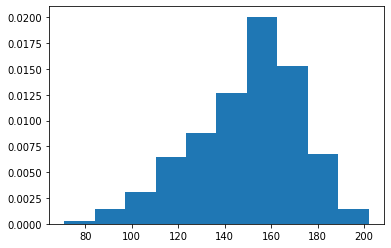

In [ ]:
plt.hist(heart_attack['Max HR'], bins=10,density=True)

The maximum heart rate data skewed to the right

(array([0.34594284, 0.64246528, 1.48261219, 3.11348559, 2.96522438,
        2.42159991, 1.23551016, 0.74130609, 0.29652244, 0.09884081]),
 array([4.55387689, 4.62881969, 4.70376249, 4.7787053 , 4.8536481 ,
        4.9285909 , 5.0035337 , 5.0784765 , 5.1534193 , 5.22836211,
        5.30330491]),
 <a list of 10 Patch objects>)

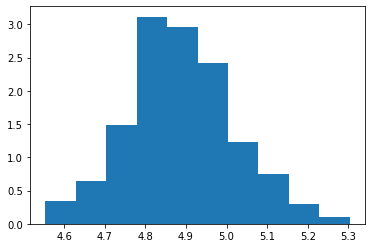

In [ ]:
plt.hist(np.log1p(heart_attack['BP']), bins=10,density=True)  

This is a transformed heart rate data set

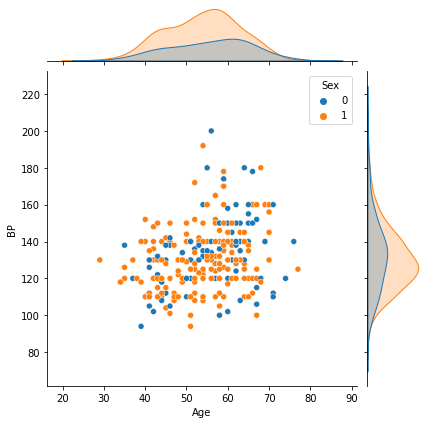

In [ ]:
# check the scatter plot 
sns.jointplot(data=heart_attack, x='Age', y='BP', hue='Sex')

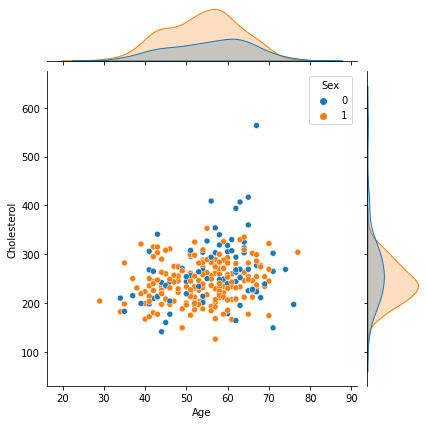

In [ ]:
# check the scatter plot 
sns.jointplot(data=heart_attack, x='Age', y='Cholesterol', hue='Sex')

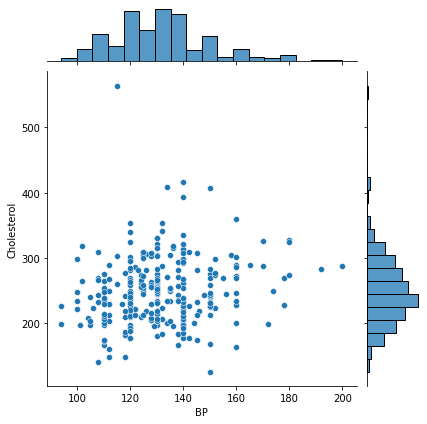

In [ ]:
sns.jointplot(data=heart_attack, x='BP', y='Cholesterol')

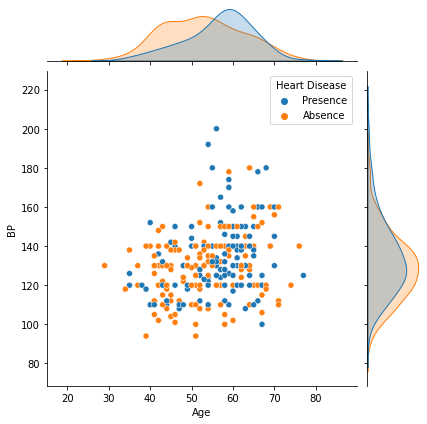

In [ ]:
sns.jointplot(data=heart_attack, x='Age', y='BP', hue='Heart Disease',kind='scatter')

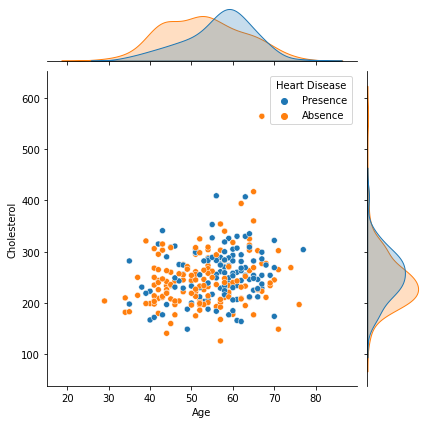

In [ ]:
sns.jointplot(data=heart_attack, x='Age', y='Cholesterol', hue='Heart Disease')

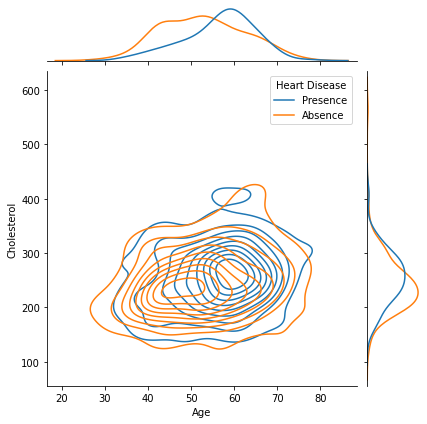

In [ ]:
sns.jointplot(data=heart_attack, x='Age', y='Cholesterol',kind='kde', hue='Heart Disease',color='green')

The scatter plot tells us the data set are not linearly distributed

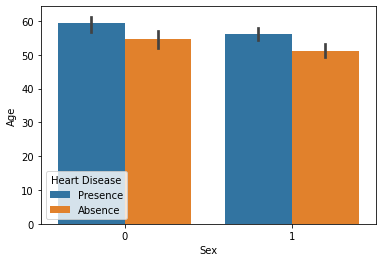

In [ ]:
# Visualizing using a categorical tools
sns.barplot(data=heart_attack, x='Sex',y="Age",hue='Heart Disease')

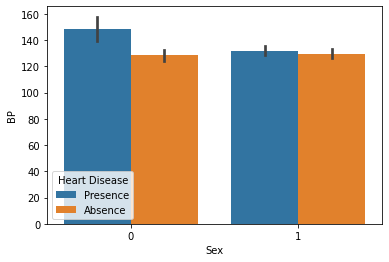

In [ ]:
sns.barplot(data=heart_attack, x='Sex',y="BP",hue='Heart Disease')

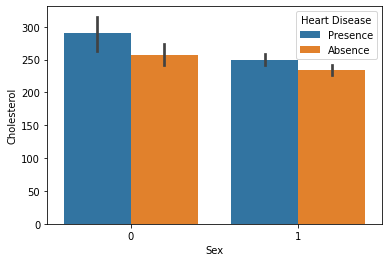

In [ ]:
sns.barplot(data=heart_attack, x='Sex',y="Cholesterol",hue='Heart Disease')

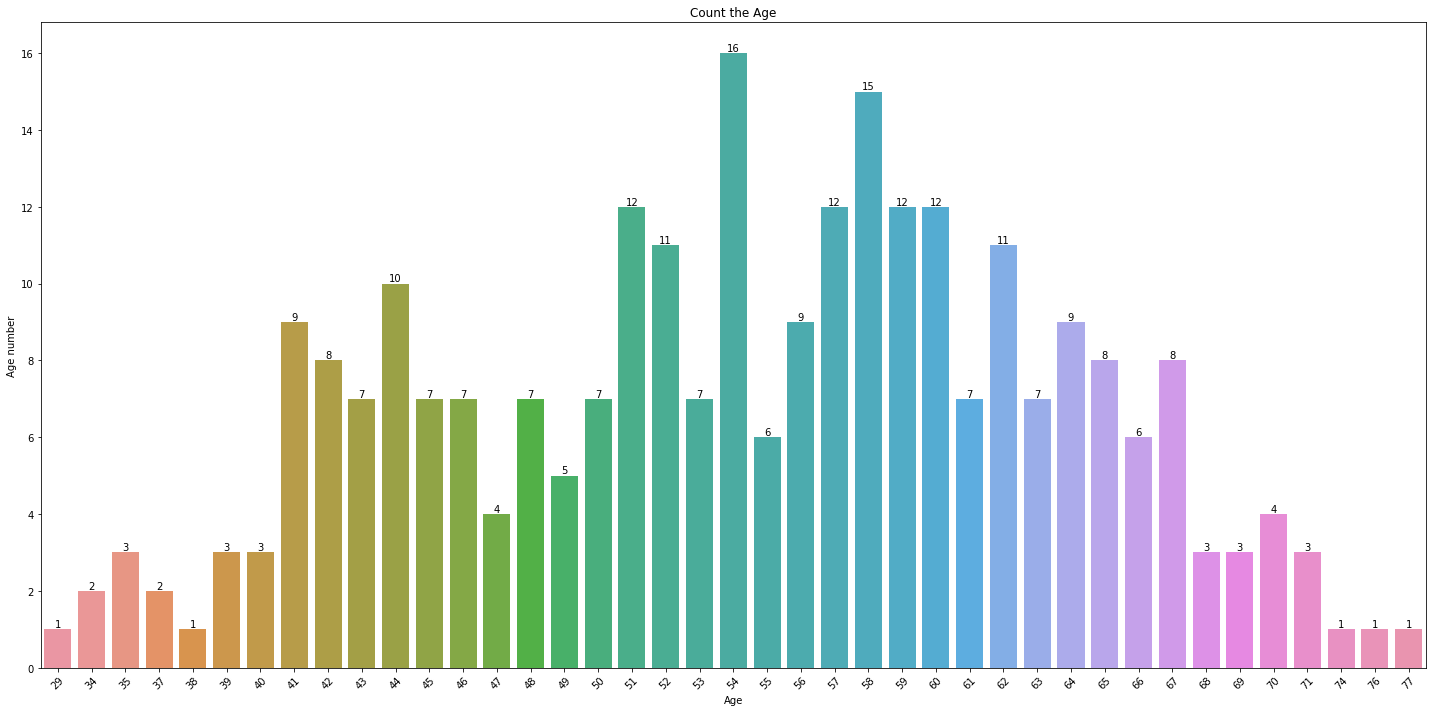

In [ ]:
# seaborn countplot 
plt.figure(figsize = (20, 10))
plot = sns.countplot( data=heart_attack,x ='Age')
plt.xticks(rotation = 45)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count the Age")
plt.xlabel("Age")
plt.ylabel("Age number")
plt.tight_layout()
plt.show()


The maximum nuber of age is between 7 to 16

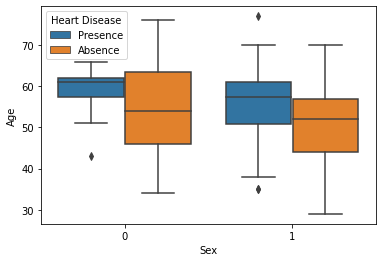

In [ ]:
sns.boxplot(data=heart_attack,x='Sex', y='Age', hue='Heart Disease')

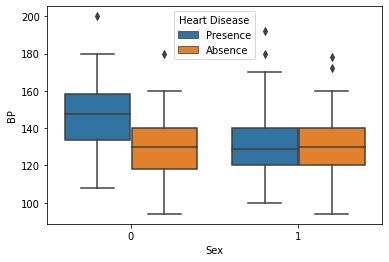

In [ ]:
sns.boxplot(data=heart_attack,x='Sex', y='BP', hue='Heart Disease')

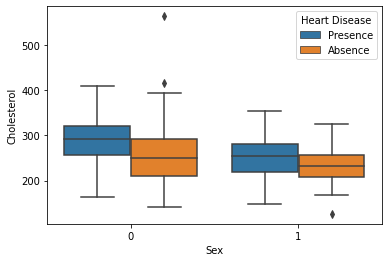

In [ ]:
sns.boxplot(data=heart_attack,x='Sex', y='Cholesterol', hue='Heart Disease')

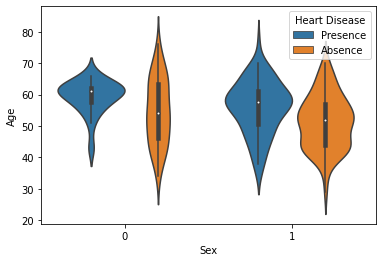

In [ ]:
sns.violinplot(data=heart_attack,x='Sex', y='Age', hue='Heart Disease')

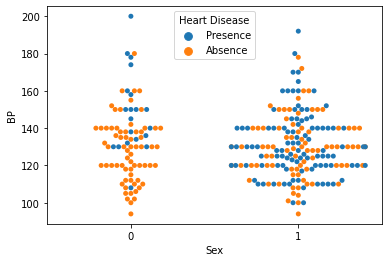

In [ ]:
sns.swarmplot(data=heart_attack,x='Sex', y='BP', hue='Heart Disease')

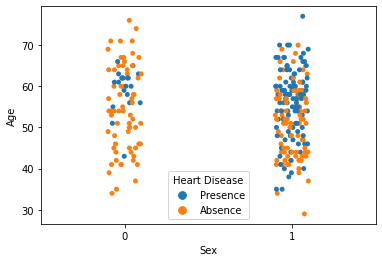

In [ ]:
sns.stripplot(data=heart_attack,x='Sex', y='Age', hue='Heart Disease')

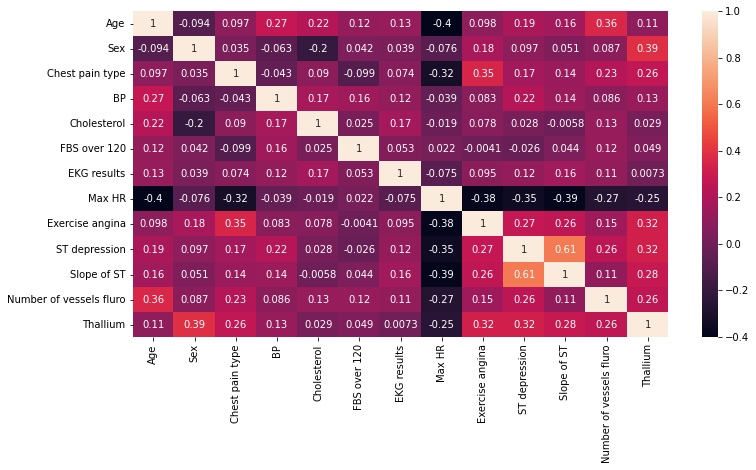

In [ ]:
from matplotlib.figure import Figure
# A seaborn matrix plots
corr=heart_attack.corr()
fig =plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

<Figure size 864x432 with 0 Axes>

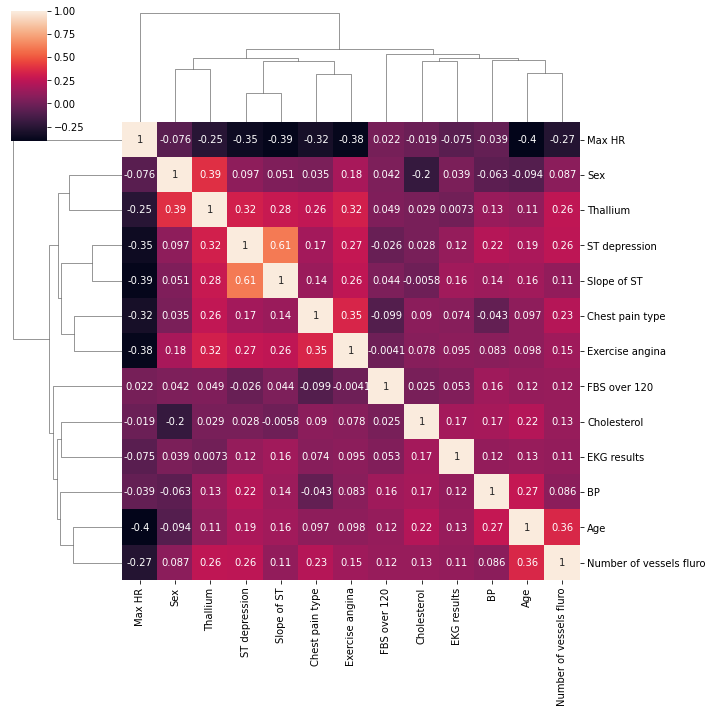

In [ ]:
corr=heart_attack.corr()
fig =plt.figure(figsize=(12,6))
sns.clustermap(corr, annot=True)

In [ ]:
heart_attack['Heart Disease'].values

array(['Presence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Abs

In [6]:
heart_attack_copy=heart_attack.copy()

In [7]:
heart_attack_copy.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### Data Preparation

In [8]:
X=heart_attack.drop('Heart Disease', axis=1)
y=heart_attack['Heart Disease'].map({ 'Presence':1, 'Absence':0})

### Split the data set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Transformer

In [10]:
extractor = SelectFromModel(LogisticRegression(penalty='l2', solver ='lbfgs' ,random_state = 42,))

### Pipelines

In [11]:
from sklearn.preprocessing import MinMaxScaler
#K nearst neighbor pipelines
knn_pipe=Pipeline(
    steps=[('scaler',StandardScaler()),
          ('knn', KNeighborsClassifier())]
)

#Decision tree pipelines
dtree_pipe=Pipeline(
    steps=[('scaler',MinMaxScaler()),
           ('dtree',DecisionTreeClassifier())]
)

#logestic regression pipelines 
lgr_pipe=Pipeline(
    steps=[('scaler',StandardScaler()),
           ('selector',extractor),
           ('lrg',LogisticRegression())]
)

#Support Vector Machine pipelines
svc_pipe=Pipeline(
    steps=[('scaler',StandardScaler()),
          ('svc',SVC())]
)

### Tunning Hyperparameters

In [12]:
math.sqrt(270)

16.431676725154983

In [13]:
#K nearst neibour hyperparamers dictionary
knn_params={'knn__n_neighbors':range(1,99,2),
        'knn__weights':['uniform','distance'],
        'knn__p':[1,2]}

#Decision tree hyperparamers dictionary
dtree_params = {'dtree__max_depth':[2,4,6],
                'dtree__min_samples_split':[0.1, 0.2, 0.05],
                'dtree__criterion': ['gini','entropy'],
                'dtree__min_samples_leaf':[1,2,3]
         }


#Support vector machine hyperparamers dictionary
#svc_params= {'svc__kernel': ['rbf', 'poly', 'linear','Sigmoid'],
              #'svc__gamma': [0.1, 1.0,10.0],
              #'svc__coef0':[0,1,2],
              #'svc__degree':[2,3,4]}
#Support vector machine hyperparamers dictionary
svc_params= {'svc__kernel': ['rbf','linear','poly','sigmoid'],
              'svc__gamma': [0.1, 1.0,10.0],
              'svc__coef0':[0,1,2],
              'svc__degree':[2,3,4]}

svc_poly_params= {'svc__kernel': ['poly','linear'],
                  'svc__gamma': [0.1, 1.0,10.0],
                  'svc__coef0':[0,1,2],
                  'svc__degree':[2,3,4]}

### Baseline

In [14]:
baseline=heart_attack['Heart Disease'].value_counts(normalize=True)
baseline

Absence     0.555556
Presence    0.444444
Name: Heart Disease, dtype: float64

### GridSearchCV

### K Nearest Neighbor Model

In [15]:
# K Nearst neighbor gridsearch
#The time.time() is a method of Time module that is used to get the time in seconds since the epoch.
start_time=time.time()
knn_grid=GridSearchCV(estimator=knn_pipe,
                      param_grid=knn_params,
                     cv=5)
knn=knn_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time - start_time)

13.151035070419312


In [16]:
knn.best_params_

{'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'}

In [17]:
knn.best_score_

0.8675675675675676

In [18]:
knn.classes_

array([0, 1])

In [76]:
knn.best_estimator_['knn'].n_neighbors

11

In [77]:
knn.best_params_['knn__n_neighbors']

11

### Decision Tree Model

In [19]:
#Decision Tree
#%time
start_time = time.time()
dtree_grid=GridSearchCV(estimator=dtree_pipe,
                      param_grid=dtree_params,
                      cv=5)
dtree=dtree_grid.fit(X_train,y_train)
end_time = time.time()
print(end_time - start_time)

2.4076807498931885


In [ ]:
dtree.best_params_

{'dtree__criterion': 'gini',
 'dtree__max_depth': 4,
 'dtree__min_samples_leaf': 3,
 'dtree__min_samples_split': 0.05}

In [ ]:
dtree.best_score_

0.7884779516358464

In [ ]:
dtree.classes_

array(['Absence', 'Presence'], dtype=object)

In [124]:
heart_attack.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [126]:
#better libary to visualize the decision tree graph
#dot_data=export_graphviz(dtree,out_file=None,
 #                                           'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
#                                           'Slope of ST', 'Number of vessels fluro', 'Thallium'],
######graph

### Logestic regression

In [20]:
start_time=time.time()
lgr_model=lgr_pipe.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

0.03675985336303711


In [21]:
lgr_model.classes_

array([0, 1])

In [ ]:
lgr_model.score(X_train,y_train),lgr_model.score(X_test,y_test)

(0.8571428571428571, 0.8271604938271605)

In [ ]:
feature_names=lgr_model.named_steps['selector'].get_feature_names_out()
feature_names

array(['x1', 'x2', 'x8', 'x9', 'x10', 'x11', 'x12'], dtype=object)

In [ ]:
lgr_model['lrg'].coef_

array([[0.44924526, 0.61116777, 0.47962233, 0.68468789, 0.39657937,
        0.81826453, 0.6083033 ]])

In [ ]:
lgr_model['lrg'].intercept_

array([-0.17066419])

### SVM Model

In [22]:
start_time=time.time()
svc_grid=GridSearchCV(estimator=svc_pipe,
                      param_grid=svc_params,
                      cv=5)
svm=svc_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

4.910804986953735


In [ ]:
svm.best_params_ 

{'svc__coef0': 0, 'svc__degree': 2, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [ ]:
svm.best_score_

0.8517780938833569

In [ ]:
start_time=time.time()
svc_grid=GridSearchCV(estimator=svc_pipe,
                      param_grid=svc_poly_params,
                      cv=5)
svm_poly=svc_grid.fit(X_train,y_train)
end_time=time.time()
print(end_time-start_time)

3.1068360805511475


In [ ]:
svm_poly.best_score_

0.8305832147937411

### Evaluating model performance

K Nearest Neighbors (KNN)

In [24]:
train_knn_pred=knn.predict(X_train)
test_knn_pred = knn.predict(X_test)
train_knn_confusion=confusion_matrix(y_train,train_knn_pred)
test_knn_confusion=confusion_matrix(y_test,test_knn_pred)

In [25]:
print(classification_report(y_train,train_knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       101
           1       0.89      0.82      0.85        88

    accuracy                           0.87       189
   macro avg       0.87      0.86      0.87       189
weighted avg       0.87      0.87      0.87       189



In [26]:
print(classification_report(y_test,test_knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        49
           1       0.91      0.66      0.76        32

    accuracy                           0.84        81
   macro avg       0.86      0.81      0.82        81
weighted avg       0.85      0.84      0.83        81



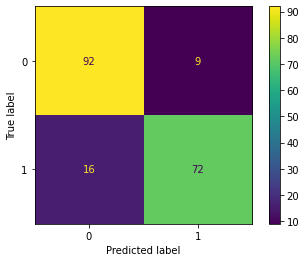

In [27]:
disp_train_knn=ConfusionMatrixDisplay(train_knn_confusion)
disp_train_knn.plot()
plt.show()

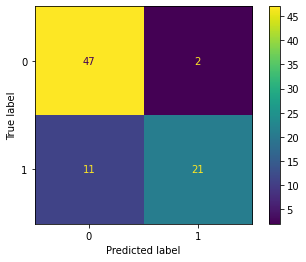

In [28]:
disp_test_knn=ConfusionMatrixDisplay(test_knn_confusion)
disp_test_knn.plot()
plt.show()

In [120]:
train_accurcy_score=accuracy_score(train_knn_pred,y_train)
test_accuracy_score=accuracy_score(test_knn_pred,y_test)
train_accurcy_score,test_accuracy_score

(0.8677248677248677, 0.8395061728395061)

In [30]:
probs_train=knn.predict_proba(X_train)
probs_test=knn.predict_proba(X_test)
probs_df=pd.DataFrame(probs_test)
probs_df.head()

,0,1
0,0.454545,0.545455
1,0.545455,0.454545
2,1.000000,0.000000
3,1.000000,0.000000
4,0.909091,0.090909


In [31]:
probs_df[0].shape,probs_df[1].shape

((81,), (81,))

In [46]:
new_train_preds = np.where(probs_train[:, 0] >.54, 0,1)
new_train_fp = 0
for i, j in zip(new_train_preds, y_test):
    if i == 0:
        if j == 1:
            new_train_fp += 1
print(new_train_fp)

new_test_preds = np.where(probs_test[:, 0] >.6, 0,1)
new_test_fp = 0
for i, j in zip(new_test_preds, y_test):
    if i == 0:
        if j == 1:
            new_test_fp += 1
print(new_test_fp)

18
8


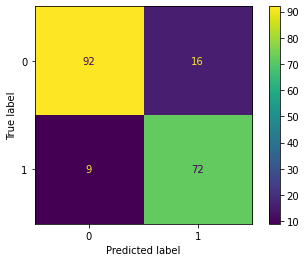

In [47]:
# Train new prediction
conf_matrix=confusion_matrix(new_train_preds,y_train,labels=knn.classes_)
disp_new=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp_new.plot()
plt.show()

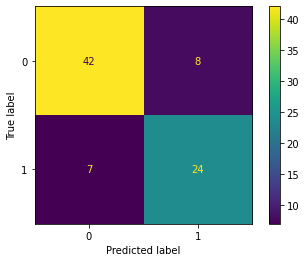

In [48]:
# Test new prediction
conf_matrix=confusion_matrix(new_test_preds,y_test,labels=knn.classes_)
disp_new=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp_new.plot()
plt.show()

In [50]:
#Results after decision boundary applied
print(classification_report(new_train_preds,y_train))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       108
           1       0.82      0.89      0.85        81

    accuracy                           0.87       189
   macro avg       0.86      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



In [51]:
print(classification_report(new_test_preds,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        50
           1       0.75      0.77      0.76        31

    accuracy                           0.81        81
   macro avg       0.80      0.81      0.81        81
weighted avg       0.82      0.81      0.82        81



### Evaluation Curves: Precision vs. Recall and ROC

In [55]:
new_train_preds

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [56]:
precision, recall, boundaries = precision_recall_curve(y_train, probs_train[:,1], pos_label=1)

In [57]:
# check the length of the boundaries 
len(boundaries)

11

In [58]:
p_r_result_df=pd.DataFrame({'Boundary':boundaries,'precision':precision[:11],'recall':recall[:11]})
p_r_result_df.head(5)

,Boundary,precision,recall
0,0.090909,0.543210,1.000000
1,0.181818,0.664062,0.965909
2,0.272727,0.734513,0.943182
3,0.363636,0.771429,0.920455
4,0.454545,0.821053,0.886364


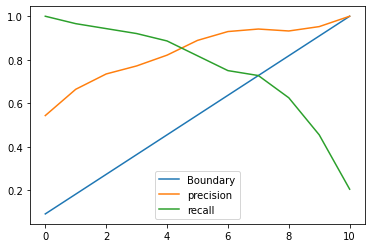

In [59]:
p_r_result_df.plot()

Text(0.5, 1.0, 'Precision vs Recall from sklearn')

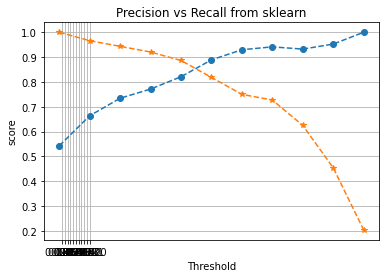

In [60]:
plt.plot(precision[:11], '--o')
plt.plot(recall[:11],'--*' )
plt.xticks(boundaries);
plt.grid()
plt.ylabel('score')
plt.xlabel('Threshold')
plt.title('Precision vs Recall from sklearn')

In [61]:
#test data set
precision, recall, boundaries = precision_recall_curve(y_test, probs_test[:,1], pos_label=1)

In [62]:
len(boundaries)

11

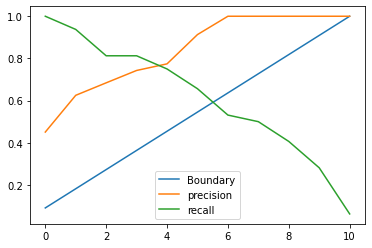

In [63]:
test_p_r_result_df=pd.DataFrame({'Boundary':boundaries,'precision':precision[:11],'recall':recall[:11]})
test_p_r_result_df.plot()

### ROC Curve
Similar to the precision_recall_curve the roc_curve function takes in y_true and y_score which can be predicted probabilities. The function returns the false positive rates, true positive rates, and thresholds. Assign these to fpr, tpr, and thresh_rocs below. Uncomment the code to visualize the ROC curve.

In [68]:
fpr,tpr,Threshold_rocs=roc_curve(y_train, probs_train[:,1], pos_label=1)

In [69]:
len(Threshold_rocs)

13

In [70]:
rocs_result_df=pd.DataFrame({'rocs_threshold':Threshold_rocs,'roc_false_positive':fpr,'roc_true_positive':tpr})
rocs_result_df.head()

,rocs_threshold,roc_false_positive,roc_true_positive
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.204545
2,0.909091,0.019802,0.454545
3,0.818182,0.039604,0.625000
4,0.727273,0.039604,0.727273
5,0.636364,0.049505,0.750000
6,0.545455,0.089109,0.818182
7,0.454545,0.168317,0.886364
8,0.363636,0.237624,0.920455
9,0.272727,0.297030,0.943182


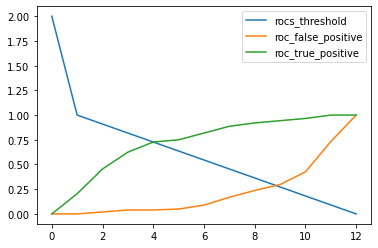

In [71]:
rocs_result_df.plot()

In [73]:
roc_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1,99, 2)}, scoring = 'roc_auc')
roc_grid.fit(X_train, y_train)
best_k = roc_grid.best_params_['knn__n_neighbors']
best_k

85

In [74]:
roc_grid.best_score_

0.9036577964519141

This is amazing, the score increases, when I use roc area under the curve as scoring

### DecisionTree model

In [78]:
train_dtree_pred=dtree.predict(X_train)
test_dtree_pred=dtree.predict(X_test)

In [79]:
print(classification_report(y_train,train_dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       101
           1       0.90      0.84      0.87        88

    accuracy                           0.88       189
   macro avg       0.89      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



In [80]:
print(classification_report(y_test,test_dtree_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        49
           1       0.83      0.62      0.71        32

    accuracy                           0.80        81
   macro avg       0.81      0.77      0.78        81
weighted avg       0.81      0.80      0.80        81



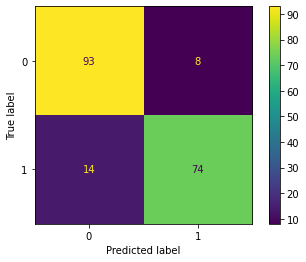

In [81]:
train_dtree_confusion=confusion_matrix(y_train,train_dtree_pred)
disp_train_dtree=ConfusionMatrixDisplay(train_dtree_confusion)
disp_train_dtree.plot()
plt.show()

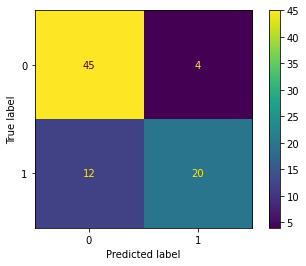

In [82]:
test_dtree_confusion=confusion_matrix(y_test,test_dtree_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_dtree_confusion)
disp_test_dtree.plot()
plt.show()

In [83]:
dtree_train_accurcy_score=accuracy_score(train_dtree_pred,y_train)
dtree_test_accuracy_score=accuracy_score(test_dtree_pred,y_test)
dtree_train_accurcy_score,dtree_test_accuracy_score

(0.8835978835978836, 0.8024691358024691)

### Logestic Regression

In [84]:
train_lgr_pred=lgr_model.predict(X_train)
test_lgr_pred=lgr_model.predict(X_test)

In [85]:
print(classification_report(y_train,train_lgr_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       101
           1       0.86      0.83      0.84        88

    accuracy                           0.86       189
   macro avg       0.86      0.86      0.86       189
weighted avg       0.86      0.86      0.86       189



In [86]:
print(classification_report(y_test,test_lgr_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        49
           1       0.85      0.69      0.76        32

    accuracy                           0.83        81
   macro avg       0.83      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81



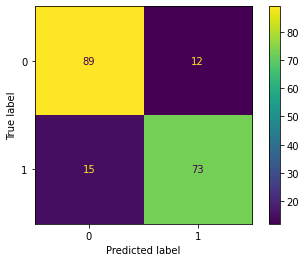

In [87]:
train_lgr_confusion=confusion_matrix(y_train,train_lgr_pred)
disp_train_lgr=ConfusionMatrixDisplay(train_lgr_confusion)
disp_train_lgr.plot()
plt.show()

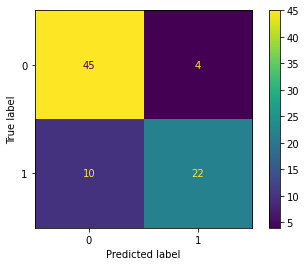

In [88]:
test_lgr_confusion=confusion_matrix(y_test,test_lgr_pred)
disp_test_lgr=ConfusionMatrixDisplay(test_lgr_confusion)
disp_test_lgr.plot()
plt.show()

In [89]:
lgr_train_accurcy_score=accuracy_score(train_lgr_pred,y_train)
lgr_test_accuracy_score=accuracy_score(test_lgr_pred,y_test)
lgr_train_accurcy_score,lgr_test_accuracy_score

(0.8571428571428571, 0.8271604938271605)

### Kernelized Logestic Regression 

In [93]:
kernel_lgr_pipe=Pipeline(
            steps=[('scaler',StandardScaler()),
                   ('selector',extractor),
                   ('lrg',LogisticRegression())]
)

In [106]:
Xtrain=polynomial_kernel(X_train,X_train,degree=2)
kernel_lgr_pipe.fit(Xtrain,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(random_state=42))),
                ('lrg', LogisticRegression())])

In [107]:
train_score=kernel_lgr_pipe.score(Xtrain,y_train)
train_score

0.7407407407407407

In [108]:
Xtrain=rbf_kernel(X_train,X_train)
kernel_lgr_pipe.fit(Xtrain,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(random_state=42))),
                ('lrg', LogisticRegression())])

In [109]:
train_score=kernel_lgr_pipe.score(Xtrain,y_train)
train_score

1.0

The train accuracy of a Logestic Regression is impoved by using a radial basis function kernel. The aacore is just boommm get a 100% score. Before was 85%. But, the model badly performed on the ploynomial kernel. The score is below 75% which is most worst than the ordinary Logestic Regression.

In [110]:
Xtest=rbf_kernel(X_test,X_test)
kernel_lgr_pipe.fit(Xtest,y_test)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(random_state=42))),
                ('lrg', LogisticRegression())])

In [111]:
test_score=kernel_lgr_pipe.score(Xtest,y_test)
test_score

1.0

The test score of a kernelized Logestic Regression also the same to the train score result. A 100% scpore is acheived oin both train and test data set.

### Support Vector Machine (SVM)

In [114]:
train_svc_pred=svm.predict(X_train)
test_svc_pred=svm.predict(X_test)

In [115]:
print(classification_report(y_train,train_svc_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       101
           1       0.95      0.92      0.94        88

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted avg       0.94      0.94      0.94       189



In [116]:
print(classification_report(y_test,test_svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        49
           1       0.81      0.69      0.75        32

    accuracy                           0.81        81
   macro avg       0.81      0.79      0.80        81
weighted avg       0.81      0.81      0.81        81



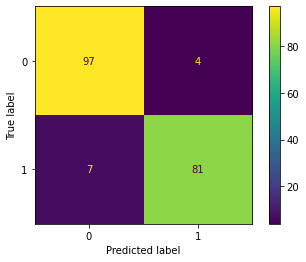

In [117]:
train_svc_confusion=confusion_matrix(y_train,train_svc_pred)
disp_train_svc=ConfusionMatrixDisplay(train_svc_confusion)
disp_train_svc.plot()
plt.show()

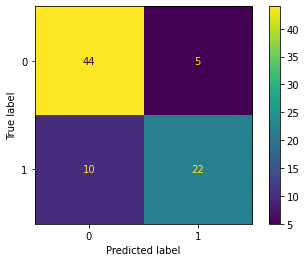

In [118]:
test_svc_confusion=confusion_matrix(y_test,test_svc_pred)
disp_test_svc=ConfusionMatrixDisplay(test_svc_confusion)
disp_test_svc.plot()
plt.show()

In [119]:
svc_train_accurcy_score=accuracy_score(train_svc_pred,y_train)
svc_test_accuracy_score=accuracy_score(test_svc_pred,y_test)
svc_train_accurcy_score,svc_test_accuracy_score

(0.9417989417989417, 0.8148148148148148)

In [123]:
pd.DataFrame({'model':['KNN','LGR','SVM','DTree'],
              'train_score':[train_accurcy_score,lgr_train_accurcy_score,svc_train_accurcy_score,dtree_train_accurcy_score],
              'test_score':[test_accuracy_score,lgr_test_accuracy_score,svc_test_accuracy_score,dtree_test_accuracy_score],
              'average_fit_time':['13.151035070419312 sec','0.03675985336303711 sec','44.910804986953735 sec','2.4076807498931885 sec']})

,model,train_score,test_score,average_fit_time
0,KNN,0.867725,0.839506,13.151035070419312 sec
1,LGR,0.857143,0.827160,0.03675985336303711 sec
2,SVM,0.941799,0.814815,44.910804986953735 sec
3,DTree,0.883598,0.802469,2.4076807498931885 sec


The SVM model is good on the train dataset, but not good performed on the test data set. The time for the processing is much higher than the others. In this paticular problem Logestic Regression process the data much faster than any other algorithms and the scores on both data sets is good. Eventhough the SVM model get 94% score on the train data. The KNN model is good. But, the downside of this model is,it required a scaled data and also need to run the whole data to predict on the new data set. DecisionTree model also good, but, as the max depth increases the model prone to overfit.The kernelized Logestic Regression performed extremly well on both data sets.The model used a Radial basis function. It scored a 100% score. Even though it gets worst on the polynomial kernel. All outputs can optimizid using the proba prediction tool. 